<a href="https://colab.research.google.com/github/RifatMuhtasim/Data_Science/blob/main/Time_Series_Forecast/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### ARIMA model is particularly useful when dealing with non-stationary time series data, which exhibit trends or seasonality.
##### If data is seasonal then use SARIMA Model.
It is a combination of three key components: p= Auto-regression (AR), d= Differencing (I), and  q= Moving Average (MA). The AR component represents the dependence of the current value in a time series on previous values. The I component is used for differencing, which is necessary when the time series is non-stationary. The MA component represents the dependency between an observation and residual errors from a moving average model applied to lagged observations

<img src="https://www.researchgate.net/profile/N-Ch-Sriman-Narayana-Iyenger/publication/319061523/figure/fig1/AS:639110742016007@1529387283344/Flow-Diagram-of-ARIMA-Model-ARIMA-is-also-known-as-Box-Jenkins-approach-To-build-a-time.png" />

Source: Youtube [Playlist](https://https://www.youtube.com/playlist?list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset

In [2]:
bangladesh_co2_df = pd.DataFrame({
    "year" : [2000, 2001, 2002, 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,],
    "co2_emissions": [0.160122047, 0.194686761, 0.203401188, 0.209737198, 0.219955044, 0.232135397, 0.251721898, 0.263586595,  0.285933318, 0.305030148, 0.340233253, 0.361557397,  0.387829235, 0.408788179,  0.425189457, 0.463517075, 0.507739270, 0.541787825, 0.586157624, 0.559733655, 0.510647559]
})

bangladesh_co2_df

,year,co2_emissions
0,2000,0.160122
1,2001,0.194687
2,2002,0.203401
3,2003,0.209737
4,2004,0.219955
5,2005,0.232135
6,2006,0.251722
7,2007,0.263587
8,2008,0.285933
9,2009,0.305030


In [3]:
train_dataset = bangladesh_co2_df[bangladesh_co2_df['year'] <= 2015]
val_dataset = bangladesh_co2_df[bangladesh_co2_df['year'] > 2015]

# Test the ARIMA (p, d, q) value

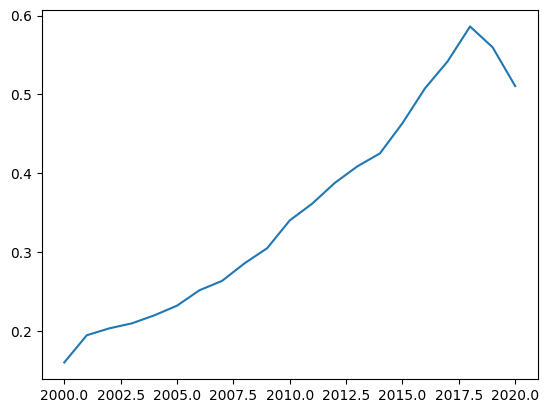

In [4]:
plt.plot(bangladesh_co2_df['year'], bangladesh_co2_df['co2_emissions'])
plt.show()

In [5]:
# Adfuller Test
from statsmodels.tsa.stattools import adfuller

# H0: It is non stationarity
# H1: It is stationarity

def Adfuller_test(data):
    result = adfuller(data)
    p_value = result[1]
    labels = ["ADF Test Statistic", "P-Value", "Lags Used", "Number of Observation Used"]
    for value, label in zip(result, labels):
        print(label + " : " + str(value))

    if p_value > 0.05:
        print("Fail to Reject the Null Hypothesis. Data is non Stationarity.")
    else:
        print("Reject the Null Hypothesis. Data is Stationarity.")

In [6]:
Adfuller_test(bangladesh_co2_df['co2_emissions'])

ADF Test Statistic : -0.5520080214532068
P-Value : 0.8814617676972282
Lags Used : 6
Number of Observation Used : 14
Fail to Reject the Null Hypothesis. Data is non Stationarity.


## Differencing

In [7]:
co2_df = bangladesh_co2_df.copy()
co2_df['co2_emissions_1st_difference'] = co2_df['co2_emissions'] - co2_df['co2_emissions'].shift(1)
co2_df.head()

,year,co2_emissions,co2_emissions_1st_difference
0,2000,0.160122,NaN
1,2001,0.194687,0.034565
2,2002,0.203401,0.008714
3,2003,0.209737,0.006336
4,2004,0.219955,0.010218


In [8]:
Adfuller_test(co2_df['co2_emissions_1st_difference'].dropna())

ADF Test Statistic : -1.1857856962958646
P-Value : 0.6796802636871844
Lags Used : 5
Number of Observation Used : 14
Fail to Reject the Null Hypothesis. Data is non Stationarity.


In [9]:
def Find_d_value_using_Adfuller_test(dataset, target):
    df = dataset.copy()
    df.rename(columns={target: 0}, inplace=True)

    def AdFuller_test(data):
        result = adfuller(data)
        p_value = result[1]
        return p_value

    for i in range(1, df.shape[0]):
        df[i] = df[i-1] - df[i-1].shift(1)
        p_value = AdFuller_test(df[i].dropna())

        if p_value <= 0.05:
            print("d-value: ", i)
            break

In [10]:
Find_d_value_using_Adfuller_test(dataset= bangladesh_co2_df, target= 'co2_emissions')

d-value:  7


# Find the p,d,q value

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

def Find_pdq_value_on_ARIMA(dataset, target):
    df = dataset.copy()
    df.rename(columns={'co2_emissions': 0}, inplace=True)

    def AdFuller_test(data):
        result = adfuller(data)
        p_value = result[1]
        return p_value

    def Pacf_Acf_Plot(data):
        fig = plt.figure(figsize=(12, 8))
        ax1 = fig.add_subplot(211)
        fig = sm.graphics.tsa.plot_pacf(data, lags=6, ax=ax1)   # p-Value
        ax2 = fig.add_subplot(212)
        fig = sm.graphics.tsa.plot_acf(data, lags=10, ax=ax2)   # q-value
        plt.show()


    for i in range(1, df.shape[0]):
        df[i] = df[i-1] - df[i-1].shift(1)
        p_value = AdFuller_test(df[i].dropna())

        if p_value <= 0.05:
            print("d-value: ", i)
            Pacf_Acf_Plot(df[i].dropna())
            break

    return df

d-value:  4


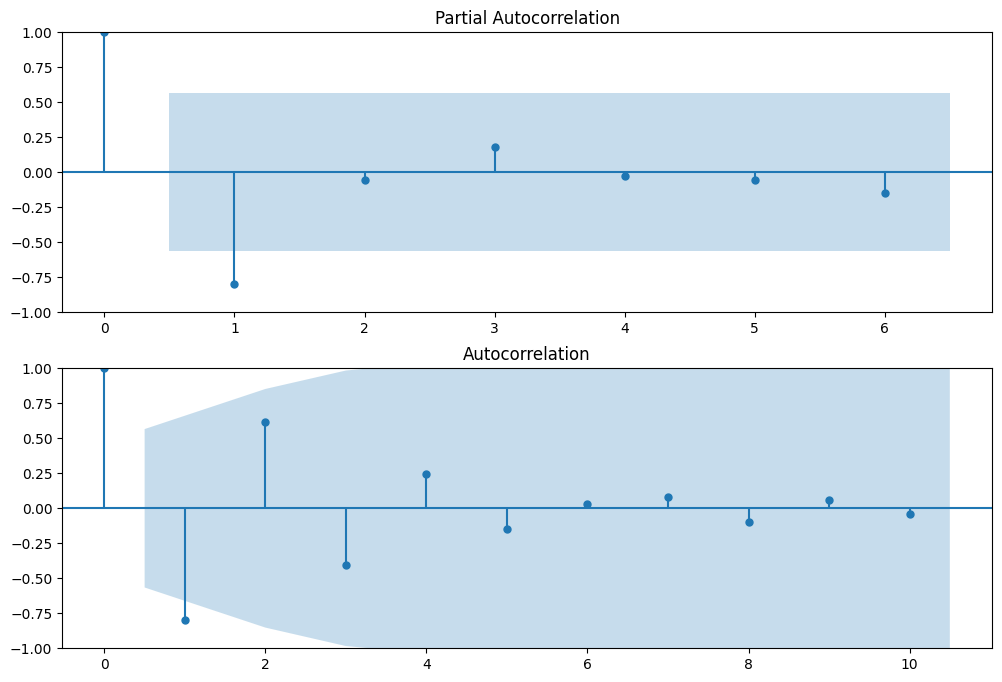

In [12]:
d_df = Find_pdq_value_on_ARIMA(dataset= train_dataset, target= 'co2_emissions')

In [13]:
# !pip install pmdarima
import pmdarima as pm

def Find_best_arima_model_params(data):
    # Specify the parameter grid to search over
    p_values = range(0, 14)  # from 2 to 10
    q_values = range(0, 10)   # from 0 to 5

    # Perform a grid search over the parameter space
    model = pm.auto_arima(data,
                          start_p=0,
                          start_q=0,
                          test='adf',
                          max_p=15,
                          max_q=10,
                          m=0,
                          d=4,  # Replace the d-value
                          seasonal=False,
                          start_P=0,
                          D=1,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True,
                          scoring='mse',  # Use Mean Squared Error for scoring
                          n_jobs=-1,      # Utilize all available CPU cores
                          p_values=p_values,
                          q_values=q_values)

    # Print the summary of the best model found
    print(model.summary())

In [14]:
Find_best_arima_model_params(train_dataset['co2_emissions'])

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,4,0)(0,0,0)[0]             : AIC=-48.426, Time=0.06 sec
 ARIMA(1,4,0)(0,0,0)[0]             : AIC=-59.501, Time=0.08 sec
 ARIMA(0,4,1)(0,0,0)[0]             : AIC=-56.482, Time=0.11 sec
 ARIMA(2,4,0)(0,0,0)[0]             : AIC=-61.158, Time=0.26 sec
 ARIMA(3,4,0)(0,0,0)[0]             : AIC=-58.952, Time=0.40 sec
 ARIMA(2,4,1)(0,0,0)[0]             : AIC=-57.624, Time=0.22 sec
 ARIMA(1,4,1)(0,0,0)[0]             : AIC=-59.238, Time=0.13 sec
 ARIMA(3,4,1)(0,0,0)[0]             : AIC=-57.023, Time=0.51 sec
 ARIMA(2,4,0)(0,0,0)[0] intercept   : AIC=-59.224, Time=0.13 sec

Best model:  ARIMA(2,4,0)(0,0,0)[0]          
Total fit time: 1.901 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(2, 4, 0)   Log Likelihood                  33.579
Date:                Sun, 05 May 2024   AIC               

# ARIMA Model

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_dataset['co2_emissions'], order=(2, 4, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
forecast_output = model_fit.forecast(steps=10).tolist()
forecast_output

[0.5044107706724743,
 0.5799290652530664,
 0.6757951307371632,
 0.8127420920499826,
 0.9900448975817892,
 1.2157193875383336,
 1.4990235856470515,
 1.841524066793907,
 2.2554657433697325,
 2.7422502136283575]

In [17]:
pred_result_df = pd.DataFrame(columns=["year", "co2_emissions"])

for idx, value in enumerate(forecast_output):
    new_df = pd.DataFrame({
        "year": [idx + 2016],
        "co2_emissions": [value]
    })
    pred_result_df = pd.concat([pred_result_df, new_df], ignore_index=True)

train_dataset = pd.concat([train_dataset, pred_result_df], ignore_index=True)

In [18]:
train_dataset

,year,co2_emissions
0,2000,0.160122
1,2001,0.194687
2,2002,0.203401
3,2003,0.209737
4,2004,0.219955
5,2005,0.232135
6,2006,0.251722
7,2007,0.263587
8,2008,0.285933
9,2009,0.305030


In [19]:
train_dataset_for_evaluate = train_dataset[(train_dataset['year'] > 2015) & (train_dataset['year'] <= 2020)]
train_dataset_for_evaluate

,year,co2_emissions
16,2016,0.504411
17,2017,0.579929
18,2018,0.675795
19,2019,0.812742
20,2020,0.990045


In [20]:
val_dataset

,year,co2_emissions
16,2016,0.507739
17,2017,0.541788
18,2018,0.586158
19,2019,0.559734
20,2020,0.510648


In [21]:
from sklearn.metrics import r2_score, mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(val_dataset['co2_emissions'],  train_dataset_for_evaluate['co2_emissions']))
rmse

0.24630704138844592